## Este código muestra, paso a paso, el funcionamiento del método de gradientes conjugados. Al final, se grafica la trayectoria de optimización, ilustrando cómo el método converge eficientemente hacia el óptimo buscado.

Ejercicio sugerido por Ruben para visualizar mejor el metodo. 🙏

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial de la función cuadrática
# Definimos una matriz A simétrica y definida positiva
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])

# Función cuadrática que queremos minimizar: f(x) = 1/2 * x^T * A * x - b^T * x
def f(x):
    return 0.5 * np.dot(x, A @ x) - np.dot(b, x)

# Gradiente de la función cuadrática
def grad_f(x):
    return A @ x - b

# Método de Gradientes Conjugados
def conjugate_gradient(A, b, x0, tol=1e-5, max_iter=100):
    x = x0
    r = b - A @ x
    d = r
    rs_old = np.dot(r, r)

    history = [x.copy()]  # Guardamos cada punto para visualización
    for i in range(max_iter):
        Ad = A @ d
        alpha = rs_old / np.dot(d, Ad)
        x = x + alpha * d
        r = r - alpha * Ad
        rs_new = np.dot(r, r)

        # Si el residuo es menor que el umbral de tolerancia, paramos
        if np.sqrt(rs_new) < tol:
            history.append(x.copy())
            break

        # Actualizamos la dirección de búsqueda
        beta = rs_new / rs_old
        d = r + beta * d
        rs_old = rs_new
        history.append(x.copy())

    return x, history

# Parámetros iniciales
x0 = np.array([0.0, 0.0])

# Ejecución del método de gradientes conjugados
x_min, path = conjugate_gradient(A, b, x0)

x_min, path


(array([0.09090909, 0.63636364]),
 [array([0., 0.]), array([0.25, 0.5 ]), array([0.09090909, 0.63636364])])

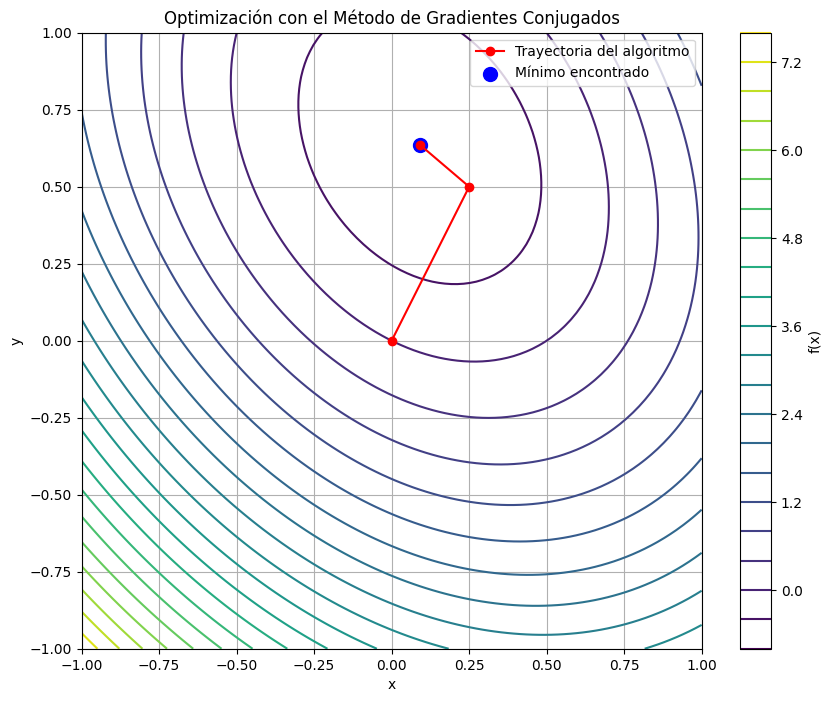

In [2]:
# Generamos una cuadrícula para visualizar el contorno de la función cuadrática
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2) - b[0]*X - b[1]*Y

# Convertimos la trayectoria en un array para graficar
path = np.array(path)

# Graficamos
plt.figure(figsize=(10, 8))
# Contornos de la función
contour = plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.colorbar(contour, label="f(x)")

# Traza de puntos
plt.plot(path[:, 0], path[:, 1], 'o-', color="red", label="Trayectoria del algoritmo")
plt.scatter(*x_min, color='blue', s=100, label="Mínimo encontrado")

# Etiquetas y detalles
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimización con el Método de Gradientes Conjugados")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()